# Airline Loyalty Program

Customer loyalty program data from Northern Lights Air (NLA), a fictitious airline based in Canada. In an effort to improve program enrollment, NLA ran a promotion between Feb - Apr 2018. Dataset includes loyalty program signups, enrollment and cancellation details, and additional customer information.

# Load Data

In [18]:
import pandas as pd

# Read the CSV files into Pandas DataFrames
customer_loyalty_df = pd.read_csv('/Users/ymadigital/Downloads/Airline-Loyalty/Customer Loyalty History.csv')
customer_flight_activity_df = pd.read_csv('/Users/ymadigital/Downloads/Airline-Loyalty/Customer Flight Activity.csv')

# Display the first few rows of each DataFrame to understand their structure
customer_loyalty_df_head = customer_loyalty_df.head()
customer_flight_activity_df_head = customer_flight_activity_df.head()

customer_loyalty_df_head

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [19]:
customer_flight_activity_df_head

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100590,2018,6,12,15276,22914.0,0,0
1,100590,2018,7,12,9168,13752.0,0,0
2,100590,2018,5,4,6504,9756.0,0,0
3,100590,2018,10,0,0,0.0,512,92
4,100590,2018,2,0,0,0.0,0,0


 The first step will be to assess the impact of the promotional campaign on loyalty program memberships, both in terms of gross and net changes. This will involve analyzing enrollment and cancellation data, particularly focusing on the Feb - Apr 2018 period. 

# EDA on Customer Loyalty History

In [21]:
# Correcting the process to filter data for the promotional period
# Simplify the approach by filtering based on year and month without converting to datetime
enrollments_during_promo_corrected = customer_loyalty_df[(customer_loyalty_df['Enrollment Year'] == 2018) & 
                                                         (customer_loyalty_df['Enrollment Month'].between(2, 4))].shape[0]

cancellations_during_promo_corrected = customer_loyalty_df.dropna(subset=['Cancellation Year', 'Cancellation Month'])
cancellations_during_promo_corrected = cancellations_during_promo_corrected[(cancellations_during_promo_corrected['Cancellation Year'] == 2018) & 
                                                                             (cancellations_during_promo_corrected['Cancellation Month'].between(2, 4))].shape[0]

# Calculate net membership changes during the promotional period using the corrected approach
net_membership_change_during_promo_corrected = enrollments_during_promo_corrected - cancellations_during_promo_corrected

{
    "Enrollments During Promo (Corrected)": enrollments_during_promo_corrected,
    "Cancellations During Promo (Corrected)": cancellations_during_promo_corrected,
    "Net Membership Change During Promo (Corrected)": net_membership_change_during_promo_corrected
}

{'Enrollments During Promo (Corrected)': 971,
 'Cancellations During Promo (Corrected)': 141,
 'Net Membership Change During Promo (Corrected)': 830}

/var/folders/1s/8_yq4qfn4wg43t727cpmhgb40000gn/T/ipykernel_4425/3636261631.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=enrollment_trend, x='Enrollment Year', y='Enrollments', estimator='sum', ci=None, marker='o')


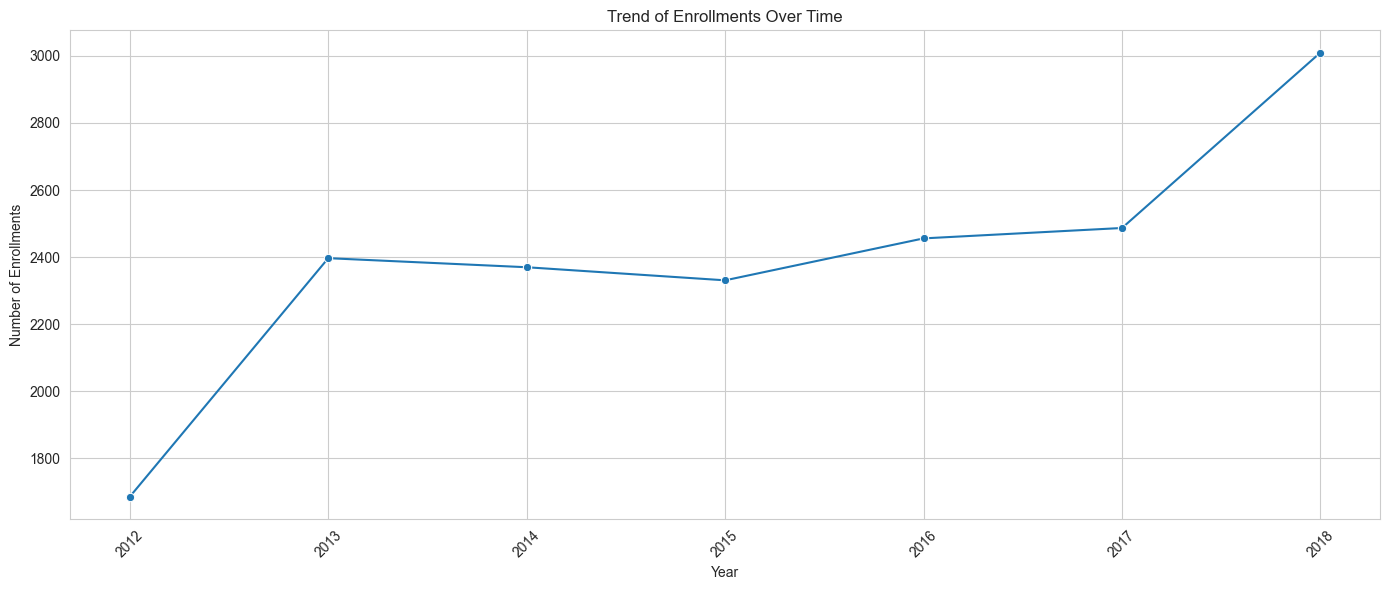

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Aggregate enrollments by year and month
enrollment_trend = customer_loyalty_df.groupby(['Enrollment Year', 'Enrollment Month']).size().reset_index(name='Enrollments')

# Plot the trend of enrollments over time
plt.figure(figsize=(14, 6))
sns.lineplot(data=enrollment_trend, x='Enrollment Year', y='Enrollments', estimator='sum', ci=None, marker='o')
plt.title('Trend of Enrollments Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Enrollments')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

This indicates that the promotional campaign had a positive impact on the loyalty program's membership, with a significant net increase in memberships during the promotional period.

# Demographic Breakdown of Loyalty Members

In [23]:
# Analyze the success of the campaign among different demographics
# Filter enrollments during the promotional period
enrollments_during_promo_df = customer_loyalty_df[(customer_loyalty_df['Enrollment Year'] == 2018) & 
                                                  (customer_loyalty_df['Enrollment Month'].between(2, 4))]

# Analyze enrollments by key demographic variables
enrollments_by_gender = enrollments_during_promo_df['Gender'].value_counts()
enrollments_by_education = enrollments_during_promo_df['Education'].value_counts()
enrollments_by_marital_status = enrollments_during_promo_df['Marital Status'].value_counts()

enrollments_by_gender


Female    494
Male      477
Name: Gender, dtype: int64

/var/folders/1s/8_yq4qfn4wg43t727cpmhgb40000gn/T/ipykernel_4425/2633184225.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_loyalty_df, x='Gender', palette='viridis')


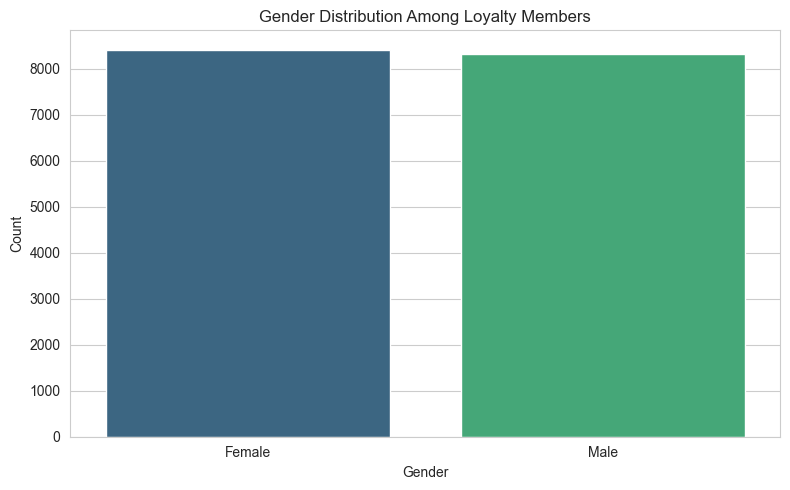

In [52]:
# Plot the gender distribution among loyalty members
plt.figure(figsize=(8, 5))
sns.countplot(data=customer_loyalty_df, x='Gender', palette='viridis')
plt.title('Gender Distribution Among Loyalty Members')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()

plt.show()

In [24]:
enrollments_by_education

Bachelor                632
College                 238
High School or Below     50
Doctor                   32
Master                   19
Name: Education, dtype: int64

/var/folders/1s/8_yq4qfn4wg43t727cpmhgb40000gn/T/ipykernel_4425/2403258590.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_loyalty_df, x='Education', order=customer_loyalty_df['Education'].value_counts().index, palette='viridis')


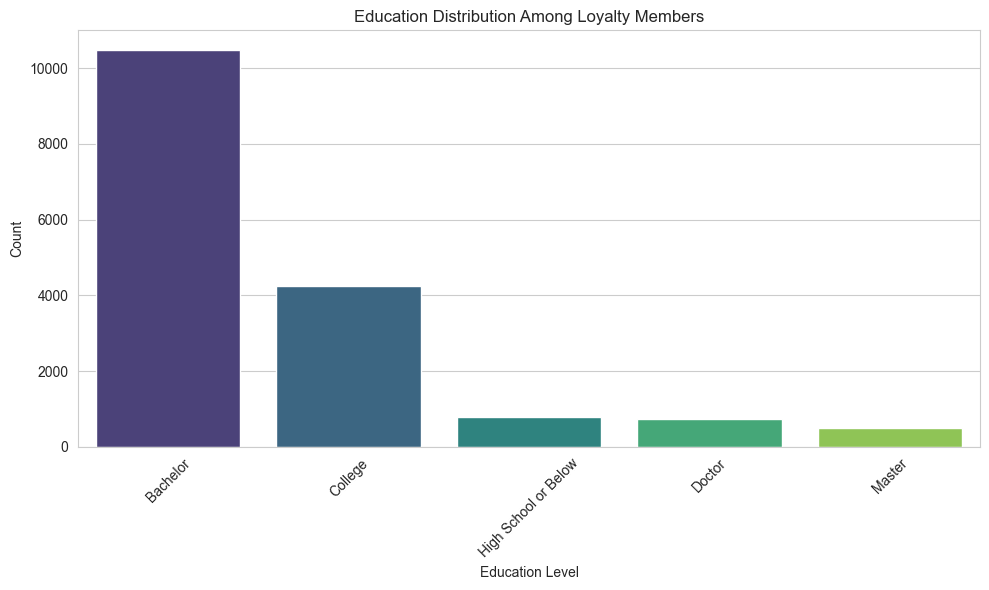

In [51]:
# Plot the education distribution among loyalty members
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_loyalty_df, x='Education', order=customer_loyalty_df['Education'].value_counts().index, palette='viridis')
plt.title('Education Distribution Among Loyalty Members')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [26]:
enrollments_by_marital_status

Married     558
Single      258
Divorced    155
Name: Marital Status, dtype: int64

/var/folders/1s/8_yq4qfn4wg43t727cpmhgb40000gn/T/ipykernel_4425/3692437376.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_loyalty_df, x='Marital Status', order=customer_loyalty_df['Marital Status'].value_counts().index , palette='viridis')


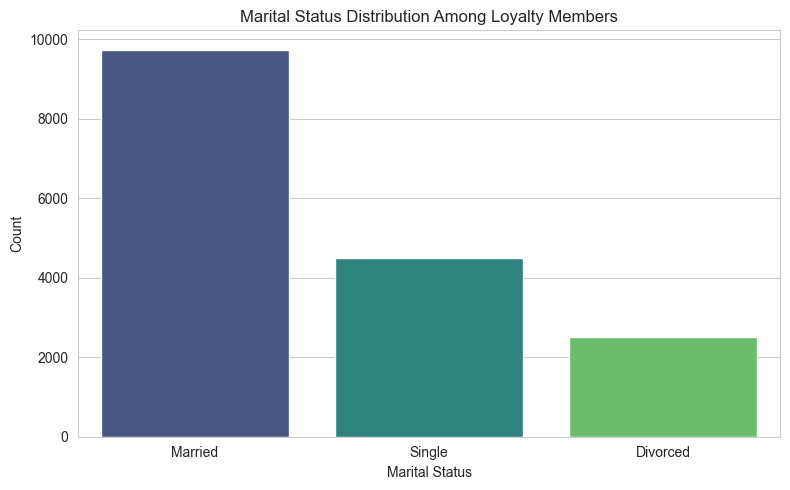

In [50]:
# Plot the marital status distribution among loyalty members
plt.figure(figsize=(8, 5))
sns.countplot(data=customer_loyalty_df, x='Marital Status', order=customer_loyalty_df['Marital Status'].value_counts().index , palette='viridis')
plt.title('Marital Status Distribution Among Loyalty Members')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.tight_layout()

plt.show()

These findings suggest that the promotional campaign was particularly successful among individuals with a Bachelor's degree and those who are married. Gender distribution was fairly balanced, with a slight preference towards female enrollments.

# Summer 2018 Flight Activity and Loyalty Rewards Analysis

This analysis investigates the relationship between flight distances and loyalty points accumulated by Northern Lights Air (NLA) loyalty members during the summer months of 2018. By examining the distribution of flights booked and visualizing the correlation between the total distance flown and points earned, we gain insights into member engagement levels and the effectiveness of promotional campaigns in encouraging travel. The findings reveal diverse flight booking behaviors among members and a positive correlation between travel distance and reward accumulation, highlighting the promotional campaign's impact on enhancing travel activity within the loyalty program.

In [29]:
# Analyze the impact of the campaign on booked flights during the summer months (June, July, August)
# Filter flight activity for summer months of 2018
summer_months = [6, 7, 8]
flight_activity_summer_2018 = customer_flight_activity_df[(customer_flight_activity_df['Year'] == 2018) &
                                                         (customer_flight_activity_df['Month'].isin(summer_months))]

# Aggregate flight activity by loyalty number to see overall flight activity during the summer
flight_activity_summer_2018_agg = flight_activity_summer_2018.groupby('Loyalty Number').agg(
    Total_Flights_Summer=('Total Flights', 'sum'),
    Total_Distance_Summer=('Distance', 'sum'),
    Points_Accumulated_Summer=('Points Accumulated', 'sum')
).reset_index()

# Calculate total flights, distance, and points for summer 2018
total_flights_summer_2018 = flight_activity_summer_2018_agg['Total_Flights_Summer'].sum()
total_distance_summer_2018 = flight_activity_summer_2018_agg['Total_Distance_Summer'].sum()
total_points_summer_2018 = flight_activity_summer_2018_agg['Points_Accumulated_Summer'].sum()

{
    "Total Flights During Summer 2018": total_flights_summer_2018,
    "Total Distance Flown During Summer 2018": total_distance_summer_2018,
    "Total Points Accumulated During Summer 2018": total_points_summer_2018
}

{'Total Flights During Summer 2018': 104584,
 'Total Distance Flown During Summer 2018': 156943135,
 'Total Points Accumulated During Summer 2018': 174932489.0}

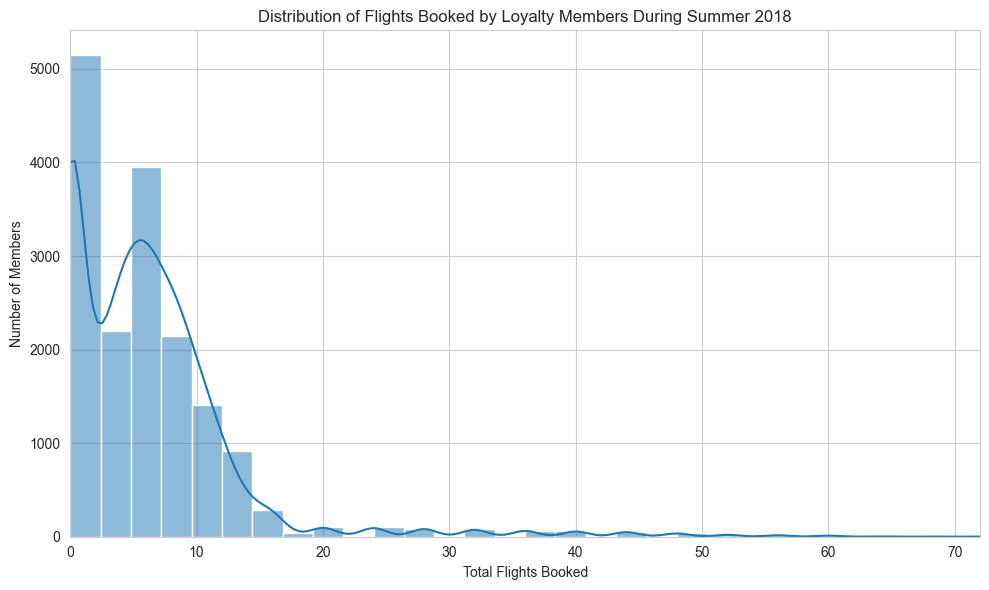

In [49]:
# Create a histogram for the distribution of the number of flights booked by individual members during summer 2018
plt.figure(figsize=(10, 6))
sns.histplot(flight_activity_summer_2018_agg['Total_Flights_Summer'], bins=30, kde=True)
plt.title('Distribution of Flights Booked by Loyalty Members During Summer 2018')
plt.xlabel('Total Flights Booked')
plt.ylabel('Number of Members')
plt.xlim(0, flight_activity_summer_2018_agg['Total_Flights_Summer'].max())
plt.tight_layout()

plt.show()

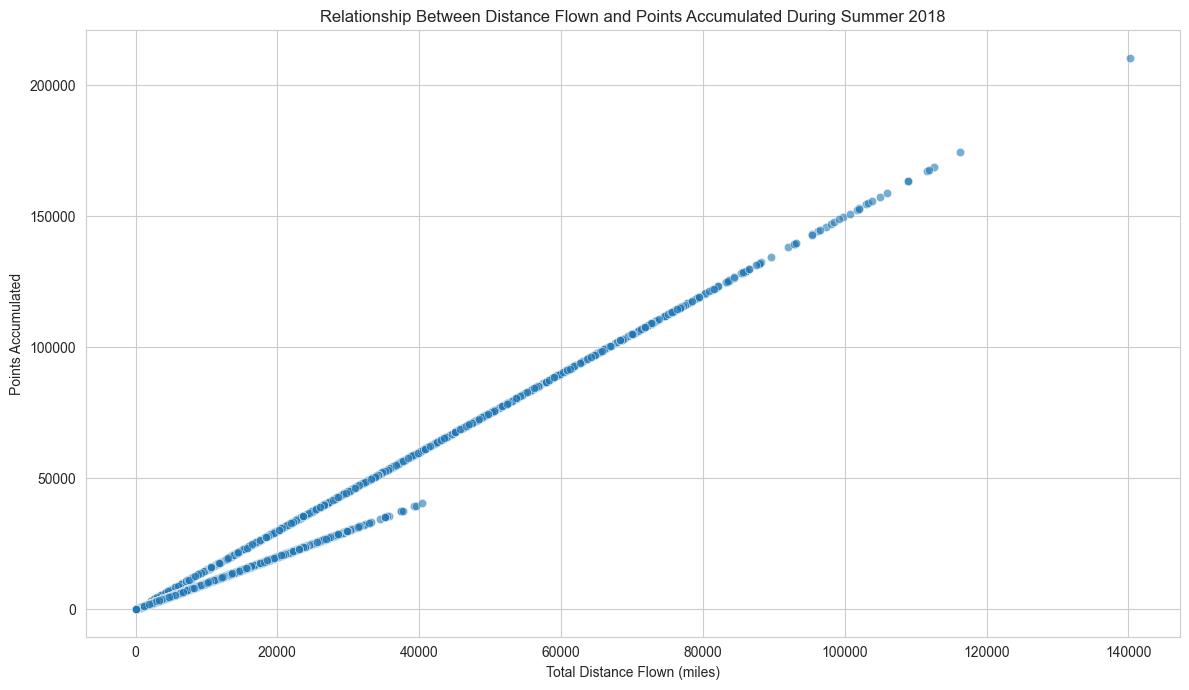

In [31]:
# Create a scatter plot for the relationship between distance flown and points accumulated during summer 2018
plt.figure(figsize=(12, 7))
sns.scatterplot(data=flight_activity_summer_2018_agg, x='Total_Distance_Summer', y='Points_Accumulated_Summer', alpha=0.6)
plt.title('Relationship Between Distance Flown and Points Accumulated During Summer 2018')
plt.xlabel('Total Distance Flown (miles)')
plt.ylabel('Points Accumulated')
plt.tight_layout()

plt.show()

The scatter plot reveals the relationship between the total distance flown and the points accumulated by loyalty members during the summer of 2018. The plot indicates a positive correlation between these two metrics: as the distance flown increases, the points accumulated also tend to increase. This suggests that members who flew longer distances accrued more loyalty points, aligning with expectations for loyalty programs where rewards are often proportional to travel activity.

### **Insights:**

**Flight Activity Distribution:** The majority of loyalty members booked a relatively low number of flights, with a small subset booking many flights. This indicates diverse engagement levels within the loyalty program.

**Distance vs. Points:** The positive correlation between distance flown and points accumulated confirms that more active travelers, in terms of distance, benefited more in terms of loyalty rewards. This could incentivize members to book longer or more flights to accumulate points faster.

**Promotional Campaign Influence:** The significant level of flight activity and points accumulation during the summer months post-campaign suggests that the promotional efforts may have successfully encouraged increased travel activity among members. This could be particularly true for members motivated by the opportunity to earn more points through increased flight bookings.

# Cohort Analysis

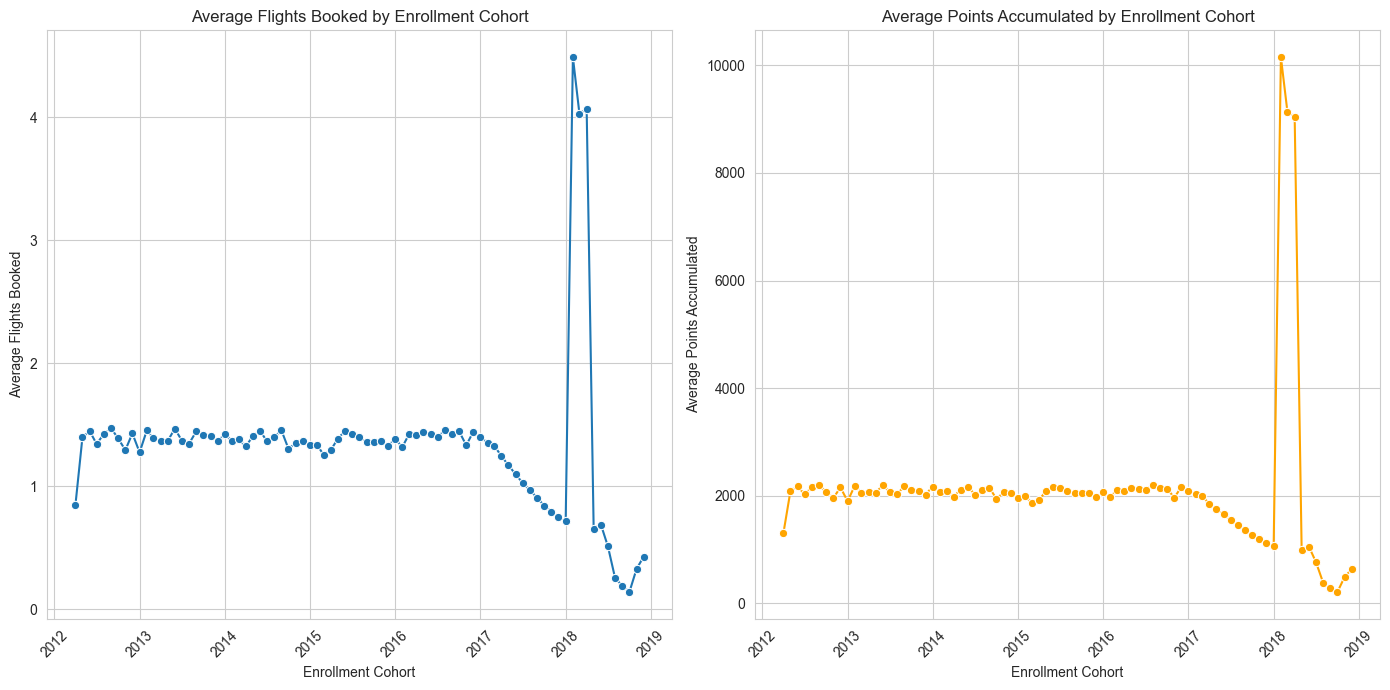

In [39]:
# Create cohorts based on enrollment year and month
customer_loyalty_df['Enrollment Cohort'] = customer_loyalty_df['Enrollment Year'].astype(str) + '-' + customer_loyalty_df['Enrollment Month'].astype(str).str.zfill(2)

# Merge the loyalty data with flight activity data to include cohort information
flight_activity_cohort = pd.merge(customer_flight_activity_df, customer_loyalty_df[['Loyalty Number', 'Enrollment Cohort']], on='Loyalty Number')

# Aggregate flight activity by cohort
cohort_activity = flight_activity_cohort.groupby('Enrollment Cohort').agg(
    Average_Flights_Booked=('Total Flights', 'mean'),
    Average_Points_Accumulated=('Points Accumulated', 'mean')
).reset_index()

# Convert 'Enrollment Cohort' to datetime for easier sorting and visualization
cohort_activity['Enrollment Cohort'] = pd.to_datetime(cohort_activity['Enrollment Cohort'], format='%Y-%m')

# Sort by 'Enrollment Cohort' for chronological plotting
cohort_activity = cohort_activity.sort_values('Enrollment Cohort')

# Visualizing the average flights and points by cohort
plt.figure(figsize=(14, 7))

# Plot for average flights booked
plt.subplot(1, 2, 1)
sns.lineplot(data=cohort_activity, x='Enrollment Cohort', y='Average_Flights_Booked', marker='o')
plt.title('Average Flights Booked by Enrollment Cohort')
plt.xlabel('Enrollment Cohort')
plt.ylabel('Average Flights Booked')
plt.xticks(rotation=45)

# Plot for average points accumulated
plt.subplot(1, 2, 2)
sns.lineplot(data=cohort_activity, x='Enrollment Cohort', y='Average_Points_Accumulated', marker='o', color='orange')
plt.title('Average Points Accumulated by Enrollment Cohort')
plt.xlabel('Enrollment Cohort')
plt.ylabel('Average Points Accumulated')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Analysis of Flight Activity by Province

In [53]:
# Merge the 'Customer Flight Activity' dataset with the 'Customer Loyalty History' dataset on 'Loyalty Number'
merged_flight_data = pd.merge(customer_flight_activity_df, customer_loyalty_df[['Loyalty Number', 'Province']], on='Loyalty Number')

# Aggregate total flights by province
total_flights_by_province = merged_flight_data.groupby('Province').agg(Total_Flights=('Total Flights', 'sum')).reset_index()

# Sort the data for better visualization
total_flights_by_province_sorted = total_flights_by_province.sort_values(by='Total_Flights', ascending=False)

total_flights_by_province_sorted

,Province,Total_Flights
6,Ontario,164105
1,British Columbia,135178
8,Quebec,99973
0,Alberta,29468
3,New Brunswick,19960
2,Manitoba,19175
5,Nova Scotia,15514
9,Saskatchewan,12278
4,Newfoundland,7635
10,Yukon,3699


/var/folders/1s/8_yq4qfn4wg43t727cpmhgb40000gn/T/ipykernel_4425/1840530494.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_flights_by_province_sorted, x='Total_Flights', y='Province', palette='viridis')


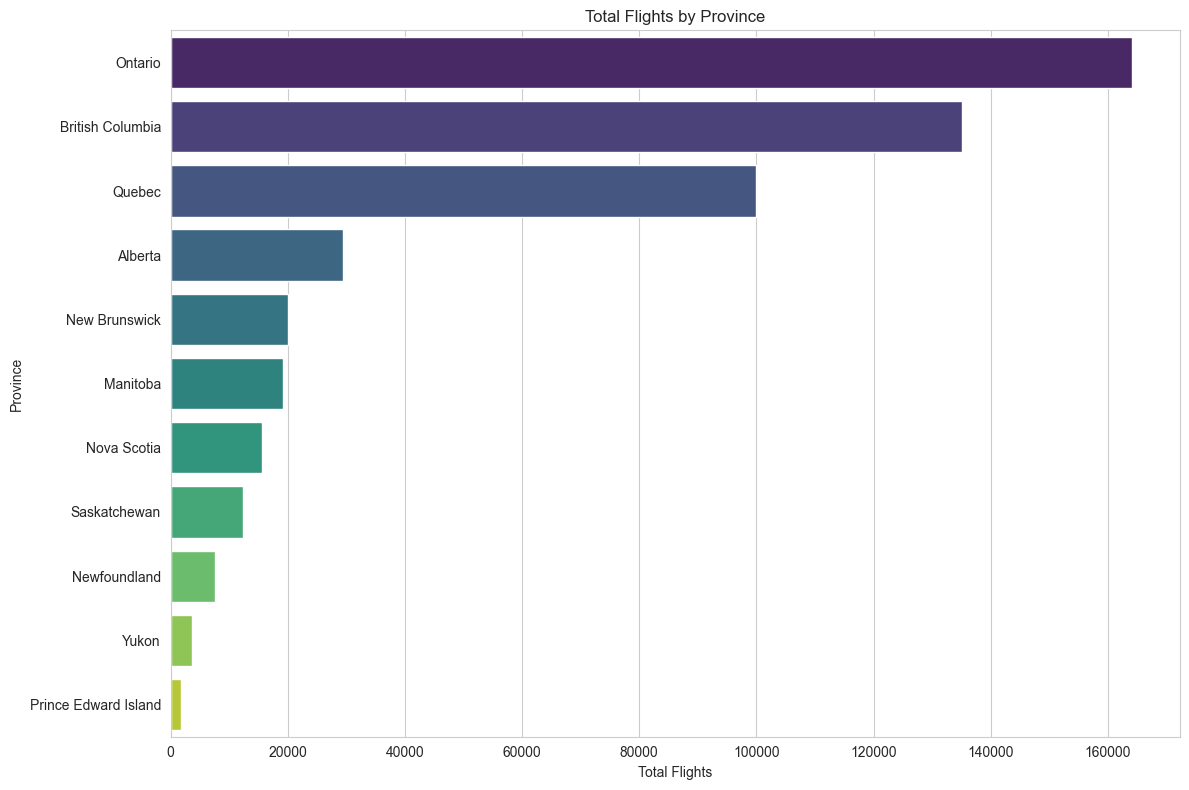

In [45]:
plt.figure(figsize=(12, 8))
sns.barplot(data=total_flights_by_province_sorted, x='Total_Flights', y='Province', palette='viridis')
plt.title('Total Flights by Province')
plt.xlabel('Total Flights')
plt.ylabel('Province')
plt.tight_layout()
plt.show()

# Project Overview

This project focused on analyzing the loyalty program data from Northern Lights Air (NLA), a fictitious airline based in Canada. The analysis covered the impact of a promotional campaign on loyalty program enrollments, demographic adoption, flight bookings during summer, and flight activity by province. Key areas of analysis included:

**Promotional Campaign Impact:** Evaluating the success of a campaign aimed at increasing loyalty program memberships.

**Demographic Adoption:** Analyzing which demographics were more inclined to enroll in the loyalty program during the campaign.

**Summer Flight Bookings:** Assessing the effect of the promotional campaign on the number of flights booked during the summer months.

**Flight Activity by Province:** Understanding regional differences in flight bookings among loyalty program members.

# Insights

**Successful Promotion:** The promotional campaign led to a significant net increase in loyalty program memberships, indicating its effectiveness in attracting new members.

**Demographic Patterns:** The campaign saw higher adoption among certain demographics, particularly among individuals with a Bachelor's degree and those who are married, suggesting that future campaigns could be tailored more specifically to target these groups.

**Increased Summer Activity:** There was a notable increase in flight bookings during the summer months following the campaign, suggesting that the promotion not only boosted loyalty program enrollments but also encouraged immediate travel activity.

**Regional Flight Activity Variations:** The analysis of flight activity by province revealed significant regional variations, with Ontario and British Columbia leading in total flights. This points to a strong market presence in these provinces and potential areas for growth in others.

# Strategic Considerations

**Tailored Marketing Strategies:** Future promotional campaigns can be designed to target demographics showing higher enrollment rates, leveraging insights from the campaign analysis to increase effectiveness.

**Seasonal Promotions:** Given the increase in summer flight bookings, NLA could consider seasonal promotions to capitalize on periods of high travel demand, possibly extending special offers to loyalty program members to encourage booking.

**Enhanced Focus on Key Markets:** Ontario and British Columbia, being the highest in flight activity, should continue to receive focused attention. Strategies could include enhancing route availability, offering exclusive loyalty program benefits, or partnering with local businesses to increase engagement.

**Growth Opportunities in Emerging Markets:** Provinces with moderate to low flight activities represent untapped potential. NLA could explore introducing new routes, customizing loyalty rewards to regional preferences, or conducting market research to understand barriers to engagement.

**Retention Strategies:** While not directly analyzed, the importance of understanding cancellation trends suggests the need for strategies aimed at retaining members, such as improving program benefits, personalized communication, and addressing feedback.